In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from helper import *

In [5]:
x_min = -0.01
x_max = 0.01

# # QuickPIC without smoothing
# filename_QuickPIC_WS = './QuickPIC_no_smooth/Species0001/Charge_slice_0001/charge_slice_xz_00000001.h5'
# x_QuickPIC_WS, lineout_QuickPIC_WS = get_lineout(filename_QuickPIC_WS,'transverse',0,'QuickPIC')
# # select visualization range
# x_QuickPIC_WS, lineout_QuickPIC_WS = select_lineout_range(x_QuickPIC_WS, lineout_QuickPIC_WS, x_min, x_max)

# # QuickPIC with smoothing
# filename_QuickPIC = './QuickPIC/Species0001/Charge_slice_0001/charge_slice_xz_00000001.h5'
# x_QuickPIC, lineout_QuickPIC = get_lineout(filename_QuickPIC,'transverse',0,'QuickPIC')
# # select visualization range
# x_QuickPIC, lineout_QuickPIC = select_lineout_range(x_QuickPIC, lineout_QuickPIC, x_min, x_max)

# QPAD (without smoothing)
filename_QPAD = '../Species2/Charge/Merged_angle_0/charge_00000010.h5'
x_QPAD, lineout_QPAD = get_lineout(filename_QPAD,'transverse',0,'QPAD')
# select visualization range
x_QPAD, lineout_QPAD = select_lineout_range(x_QPAD, lineout_QPAD, x_min, x_max)

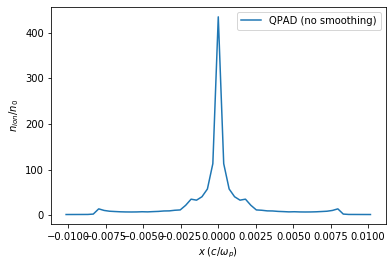

In [7]:
### Plot the data
# plt.plot(x_QuickPIC_WS, lineout_QuickPIC_WS,label = 'QuickPIC no smoothing')
# plt.plot(x_QuickPIC, lineout_QuickPIC,label = 'QuickPIC (with smoothing)')
plt.plot(x_QPAD, lineout_QPAD,label = 'QPAD (no smoothing)')
plt.legend(loc='upper right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 9})
plt.show()

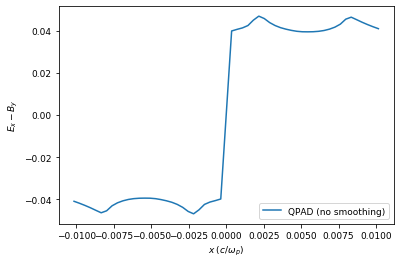

In [11]:
# # QuickPIC without smoothing
# filename_QuickPIC_WS = './QuickPIC_no_smooth/Fields/Fx_slice0001/fxslicexz_00000001.h5'
# x_QuickPIC_WS, lineout_QuickPIC_WS = get_lineout(filename_QuickPIC_WS,'transverse',0,'QuickPIC')
# # select visualization range
# x_QuickPIC_WS, lineout_QuickPIC_WS = select_lineout_range(x_QuickPIC_WS, lineout_QuickPIC_WS, x_min, x_max)

# # QuickPIC with smoothing
# filename_QuickPIC = './QuickPIC/Fields/Fx_slice0001/fxslicexz_00000001.h5'
# x_QuickPIC, lineout_QuickPIC = get_lineout(filename_QuickPIC,'transverse',0,'QuickPIC')
# # select visualization range
# x_QuickPIC, lineout_QuickPIC = select_lineout_range(x_QuickPIC, lineout_QuickPIC, x_min, x_max)

# QPAD (without smoothing)
filename_QPAD = '../Fields/Fr/Merged_angle_0/fr_00000010.h5'
x_QPAD, lineout_QPAD = get_lineout(filename_QPAD,'transverse',0,'QPAD')

# # Flip QPAD's result
n = len(lineout_QPAD) // 2
for i in range(n):
    lineout_QPAD[i] = -lineout_QPAD[i]

# select visualization range
x_QPAD, lineout_QPAD = select_lineout_range(x_QPAD, lineout_QPAD, x_min, x_max)

### Plot the data
# plt.plot(x_QuickPIC_WS, lineout_QuickPIC_WS,label = 'QuickPIC no smoothing')
# plt.plot(x_QuickPIC, lineout_QuickPIC,label = 'QuickPIC (with smoothing)')
plt.plot(x_QPAD, lineout_QPAD,label = 'QPAD (no smoothing)')
plt.legend(loc='lower right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$E_x - B_y$')
plt.rcParams.update({'font.size': 10})
plt.show()

0.0007264187866927729


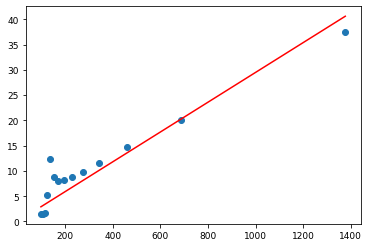

In [57]:
first_pos_idx = (len(x_QPAD) + 1)// 2
x_pos_QPAD = x_QPAD[first_pos_idx :]
print(x_pos_QPAD[0])
lineout_pos_QPAD = lineout_QPAD[first_pos_idx :]
x_pos_QPAD_inverse = 1 / x_pos_QPAD
plt.scatter(x_pos_QPAD_inverse,lineout_pos_QPAD)

x_pos_QPAD_inverse = x_pos_QPAD_inverse.reshape(-1,1)
lineout_pos_QPAD = lineout_pos_QPAD.reshape(-1,1)
model = LinearRegression(fit_intercept=False)
model.fit(x_pos_QPAD_inverse,lineout_pos_QPAD)
lineout_pos_QPAD_pred = model.predict(x_pos_QPAD_inverse)
plt.plot(x_pos_QPAD_inverse, lineout_pos_QPAD_pred, color='red')


# Appendix: Simple example of performing linear regression in Python

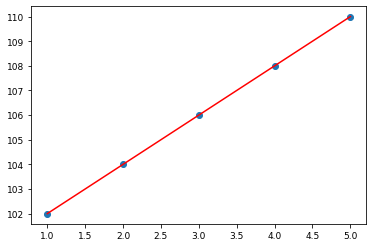

In [58]:
a = np.array([1,2,3,4,5])
b = 2 * a + 100
a = a.reshape(-1,1)
b = b.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(a,b)
b_pred = model.predict(a)

plt.scatter(a, b)
plt.plot(a, b_pred, color='red')
plt.show()